<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Sectors by Country

This notebooks looks at the distribution of sectors for different countries.

In [1]:
countries = (
    # North America
    ("usa-stk", "United States"),
    ("canada-stk", "Canada"),
    ("mexico-stk", "Mexico"),
    
    # Asia
    ("australia-stk", "Australia"),
    ("japan-stk", "Japan"),
    ("hongkong-stk", "Hong Kong"),
    ("singapore-stk", "Singapore"),
    
    # Europe
    ("spain-stk", "Spain"),
    ("netherlands-stk", "Netherlands"),
    ("uk-stk", "United Kingdom"),
    ("germany-stk", "Germany"),
    ("france-stk", "France"),
    ("belgium-stk", "Belgium"),
    ("swiss-stk", "Switzerland"),
    ("austria-stk", "Austria"),
    ("sweden-stk", "Sweden"),
    ("italy-stk", "Italy"),
)

Get a DataFrame of countries (columns) and sectors (index):

In [2]:
from quantrocket.master import download_master_file
import io
import pandas as pd

all_countries = {}

for universe, country in countries:
    f = io.StringIO()
    download_master_file(f, universes=universe, fields="ibkr_Sector")
    securities = pd.read_csv(f)
    all_countries[country] = securities.groupby(securities.ibkr_Sector).Sid.count()
    
sectors = pd.concat(all_countries).unstack().T

Convert to percentages:

In [3]:
sizes = sectors.sum()
sectors = sectors / sizes
sectors = sectors.round(3) * 100

Transpose:

In [4]:
sectors = sectors.fillna(0).T

Drop minor sectors to simplify plot:

In [5]:
sectors = sectors.drop(["Funds","Government", "Diversified"], axis=1)

Plot:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette=sns.color_palette("hls", n_colors=len(sectors.columns)))

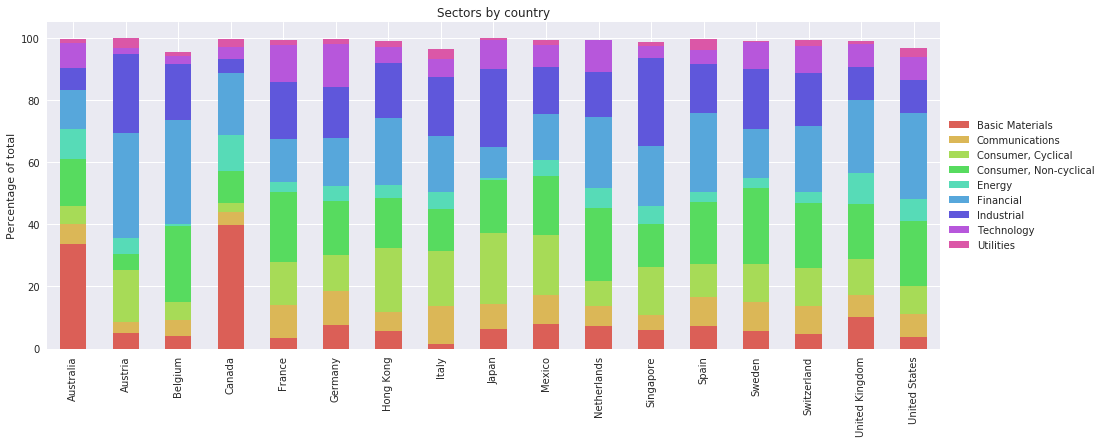

In [7]:
ax = sectors.plot(kind="bar", stacked=True, title="Sectors by country", figsize=(16,6))
ax.set_ylabel("Percentage of total")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

***

[Back to Introduction](Introduction.ipynb)